In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xgboost
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.7 MB/s eta 0:00:00


In [5]:
trainData = pd.read_csv("dataset/train_u6lujuX_CVtuZ9i.csv")
trainData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
def voidValues(df):
    a = null_null_values = df.isnull().sum()
    return a

In [7]:
#Dealing with Categorical NULL Values

In [8]:
print(trainData.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [9]:
trainData.drop(["Loan_ID","Dependents"], axis=1,inplace=True)

In [10]:
#Categorical
cols = trainData[["Gender","Married","Self_Employed"]]
for i in cols:
    trainData[i].fillna(trainData[i].mode().iloc[0],inplace=True)

/var/folders/jj/4rx3jjn15213h4w739bjr_0h0000gn/T/ipykernel_33025/3135541551.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trainData[i].fillna(trainData[i].mode().iloc[0],inplace=True)


In [11]:
#Numerical
n_cols = trainData[["LoanAmount", "Loan_Amount_Term", "Credit_History"]] 
for i in n_cols: 
    trainData[i].fillna(trainData[i].mean(axis=0), inplace=True)

/var/folders/jj/4rx3jjn15213h4w739bjr_0h0000gn/T/ipykernel_33025/2826180664.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trainData[i].fillna(trainData[i].mean(axis=0), inplace=True)


In [12]:
#Visualize (Bar Chart)
def bar_chart(col): 
    Approved = trainData[trainData["Loan_Status"]=="Y"][col].value_counts() 
    Disapproved = trainData[trainData["Loan_Status"]=="N"][col].value_counts() 
    
    df1 = pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    df1.plot(kind="bar")

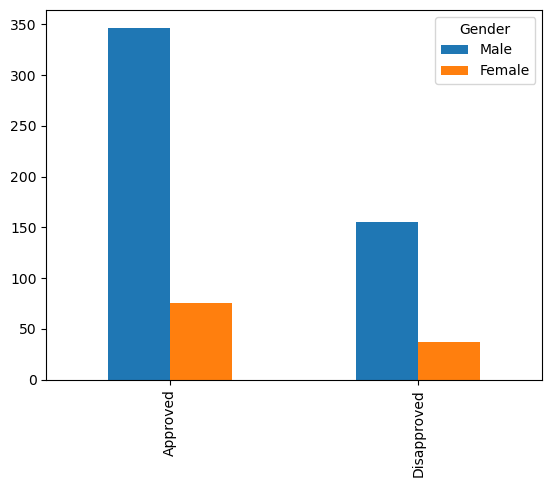

In [13]:
bar_chart("Gender")

In [14]:
trainData.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [15]:
from sklearn.preprocessing import OrdinalEncoder #Ordinal Encoder encodes categorical variables into ordinal position(numerical)

ord_enc = OrdinalEncoder()
trainData[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(trainData[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']])
trainData.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [16]:
trainData[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = trainData[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']].astype('int')

In [17]:
trainData.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [18]:
from sklearn.model_selection import train_test_split
x = trainData.drop("Loan_Status", axis=1)
y = trainData["Loan_Status"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(491, 10)
(491,)
(123, 10)
(123,)


In [19]:
from sklearn.naive_bayes import GaussianNB
gfc = GaussianNB()
gfc.fit(X_train,Y_train)
pred1 = gfc.predict(X_test)

In [20]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
def loss(y_true, y_pred):
    pre = precision_score(y_true,y_pred)
    rec = recall_score(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)

    print(pre)
    print(rec)
    print(acc)
    

In [21]:
loss(Y_test,pred1)

0.7766990291262136
0.9523809523809523
0.7804878048780488


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [27]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [31]:
svc = SVC(C=0.1, gamma=1, kernel='rbf')
svc.fit(X_train,Y_train)
pred2 = svc.predict(X_test)
loss(Y_test,pred2)

0.6829268292682927
1.0
0.6829268292682927


In [39]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, Y_train) 
pred3 = xgb.predict(X_test) 
loss(Y_test, pred3)

0.797752808988764
0.8452380952380952
0.7479674796747967


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, Y_train) 
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    Y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(Y_test, Y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

In [44]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.819
Test score: 0.772


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pack

DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')

In [45]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')
ds.fit(X_train,Y_train)
pred4 = ds.predict(X_test)
loss(Y_test,pred4)

0.7592592592592593
0.9761904761904762
0.7723577235772358


In [46]:
import joblib 
joblib.dump(ds, "model.pkl") 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])